In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/RLWorms_Data/New_Lines/L446

/content/drive/MyDrive/RLWorms_Data/New_Lines/L446


In [ ]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [ ]:
fnames = []
for fname in os.listdir('./L446_Ctrls/'):
    if '.pkl' in fname:
        print(fname)
        fnames.append(fname)

2023-02-02_13-18-39.pkl
2023-02-02_13-42-05.pkl
2023-02-02_14-08-58.pkl
2023-02-02_14-34-29.pkl
2023-02-02_14-57-08.pkl
2023-02-03_15-46-09.pkl
2023-02-03_16-09-57.pkl
2023-02-03_16-33-31.pkl
2023-02-03_16-57-07.pkl
2023-02-03_17-20-21.pkl


In [ ]:
with open(f'L446_Evals/{fnames[0]}','rb') as f:
    track = pickle.load(f)

In [ ]:
tdict = {
    'up1':   [1080,-50],
    'down1': [1080,-1850],
    'left1': [250,-960],
    'right1':[1980,-960],
    
    'up2':   [1080,-170],
    'down2': [1080,-1550],
    'left2': [360,-860],
    'right2':[1740,-860]
}

targets = [
    'right2',
    'left1',
    'down2',
    'up1',
    'right2',
    
    'left2',
    'up2',
    'down2',
    'down1',
    'right2'
]

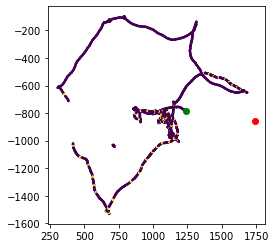

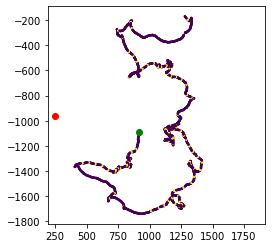

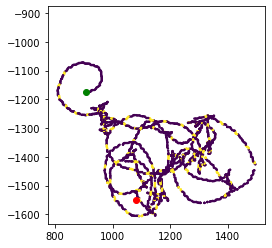

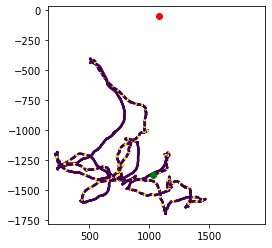

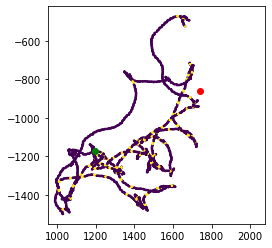

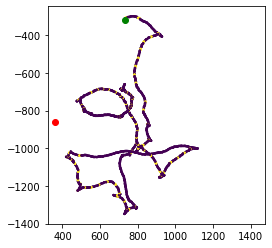

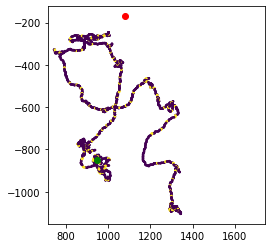

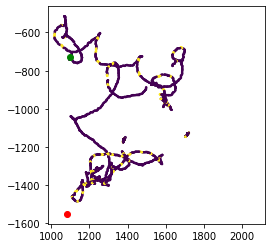

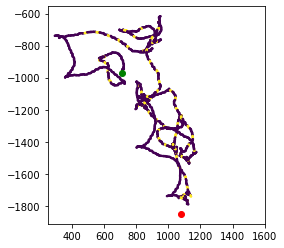

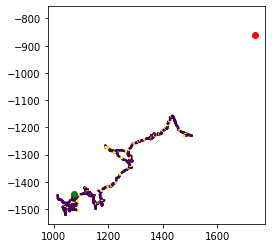

In [ ]:
for track_ind in range(10):
    plt.figure()
    with open(f'L446_Evals/{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    plt.scatter(track['x'], track['y'],s=2,c=track['action'])
    plt.plot(*tdict[targets[track_ind]],'o',c='red')
    plt.plot(track['x'][0],track['y'][0],'o',c='green')
    plt.axis('square')
    plt.savefig(f'./L446_Evals/track{track_ind}.svg')

In [ ]:
all_closests = []
for track_ind in range(10):
    with open(f'L446_Evals/{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    closest = 1e6
    target = tdict[targets[track_ind]]
    for pt in range(len(track['x'])):
        dist = np.linalg.norm(np.array([track['x'][pt], track['y'][pt]]) - np.array(target))
        if dist < closest:
            closest = dist
    all_closests.append(closest)

In [ ]:
all_closests

[217.59825366946308,
 423.3320209953412,
 11.313708498984761,
 646.4711903867023,
 51.66236541235796,
 159.86244086714052,
 108.18964830333815,
 82.37718130647589,
 71.69379331573968,
 424.976469936866]

In [ ]:
closest_cm = np.array(all_closests)/540
closest_cm

array([0.40295973, 0.78394819, 0.02095131, 1.19716887, 0.09567105,
       0.29604156, 0.2003512 , 0.15255034, 0.13276628, 0.78699346])

In [ ]:
print(np.mean(closest_cm), np.std(closest_cm))

0.4069401986467425 0.36766719622610894


In [ ]:
# Get light
all_closests = []
all_lights = 0
total_len = 0
for track_ind in range(10):
    with open(f'L446_Evals/{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    all_lights += sum(track['action'])
    total_len += len(track['action'])

In [ ]:
all_lights /total_len

array([0.1525])

# Controls: random light

In [ ]:
fnames

['2023-01-29_12-35-03.pkl',
 '2023-01-29_12-36-17.pkl',
 '2023-01-29_12-59-02.pkl',
 '2023-01-29_13-01-15.pkl',
 '2023-01-29_13-22-32.pkl',
 '2023-01-29_13-25-18.pkl',
 '2023-01-29_13-46-05.pkl',
 '2023-01-29_13-50-26.pkl',
 '2023-01-29_14-09-46.pkl',
 '2023-01-29_14-15-18.pkl',
 '2023-01-29_14-32-06.pkl',
 '2023-01-29_14-42-50.pkl',
 '2023-01-29_14-55-41.pkl',
 '2023-01-29_15-08-46.pkl',
 '2023-01-29_15-19-35.pkl',
 '2023-01-29_15-34-05.pkl',
 '2023-01-29_15-43-17.pkl',
 '2023-01-29_15-59-26.pkl',
 '2023-01-29_16-06-29.pkl',
 '2023-01-29_16-24-35.pkl']

In [ ]:
with open(f'446_RandomLight/{fnames[0]}','rb') as f:
    track = pickle.load(f)

In [ ]:
tdict = {
    'up1':   [1080,-50],
    'down1': [1080,-1850],
    'left1': [250,-960],
    'right1':[1980,-960],
    
    'up2':   [1080,-170],
    'down2': [1080,-1550],
    'left2': [360,-860],
    'right2':[1740,-860]
}

targets = [
    'left1',
    'right2',
    'up1',
    'down1',
    'left1',
    
    'right2',
    'up1',
    'left2',
    'left1',
    'right2'
]

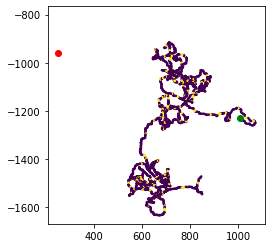

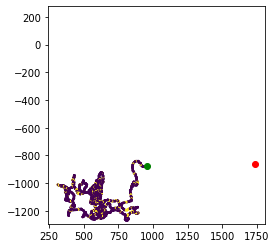

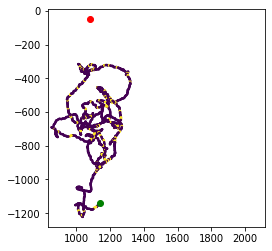

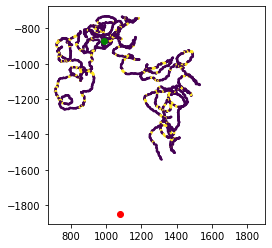

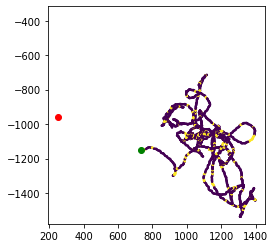

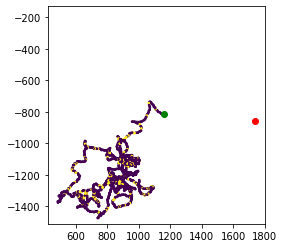

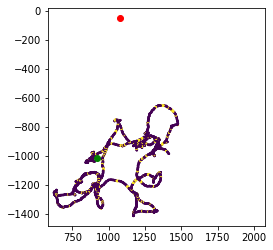

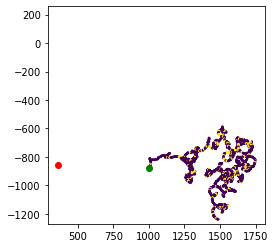

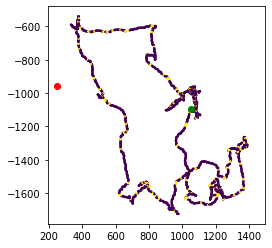

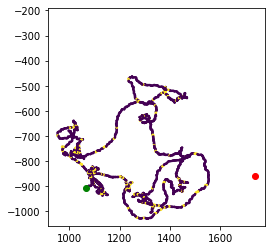

In [ ]:
for track_ind in range(10):
    plt.figure()
    with open(f'L446_RandomLight/{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    plt.scatter(track['x'], track['y'],s=2,c=track['action'])
    plt.plot(*tdict[targets[track_ind]],'o',c='red')
    plt.plot(track['x'][0],track['y'][0],'o',c='green')
    plt.axis('square')
    plt.savefig(f'./L446_RandomLight/track{track_ind}.svg')

In [ ]:
all_closests = []
for track_ind in range(10):
    with open(f'L446_RandomLight/{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    closest = 1e6
    target = tdict[targets[track_ind]]
    for pt in range(len(track['x'])):
        dist = np.linalg.norm(np.array([track['x'][pt], track['y'][pt]]) - np.array(target))
        if dist < closest:
            closest = dist
    all_closests.append(closest)

In [ ]:
all_closests

[396.50472884948044,
 784.230195797127,
 268.09140232390894,
 386.8074456367147,
 519.0269742508572,
 580.5945228815029,
 655.5120136198879,
 643.1990360689294,
 221.35943621178654,
 185.06755523321746]

In [ ]:
closest_cm = np.array(all_closests)/540
closest_cm

array([0.73426802, 1.45227814, 0.49646556, 0.71631008, 0.96116106,
       1.07517504, 1.21391114, 1.19110933, 0.40992488, 0.34271769])

In [ ]:
print(np.mean(closest_cm), np.std(closest_cm))

0.8593320946061874 0.3579064794394418


The U-value is 19. The critical value of U at p < .05 is 27. Therefore, the result is significant at p < .05.

The z-score is 2.30558. The p-value is .01044. The result is significant at p < .05.

# No light

In [ ]:
tdict = {
    'up1':   [1080,-50],
    'down1': [1080,-1850],
    'left1': [250,-960],
    'right1':[1980,-960],
    
    'up2':   [1080,-170],
    'down2': [1080,-1550],
    'left2': [360,-860],
    'right2':[1740,-860]
}

targets = [
    'up1',
    'down1',
    'left1',
    'right1',
    'up1',
    
    'down1',
    'left1',
    'right1',
    'up1',
    'right1'
]

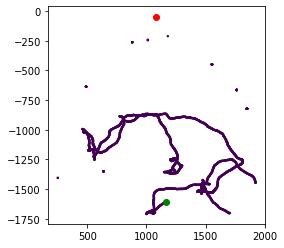

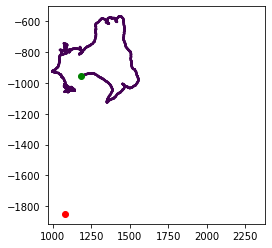

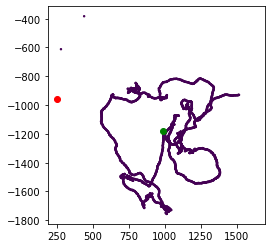

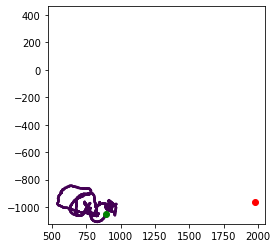

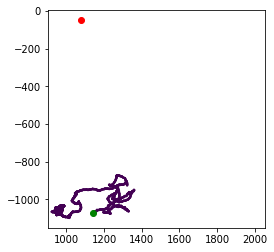

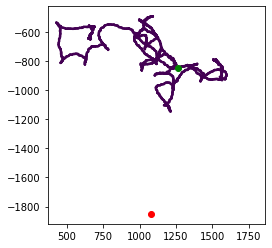

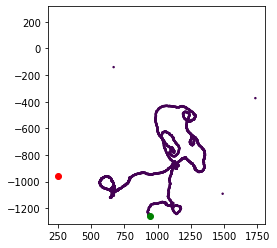

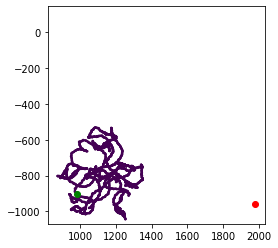

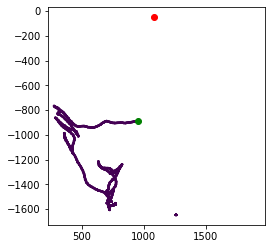

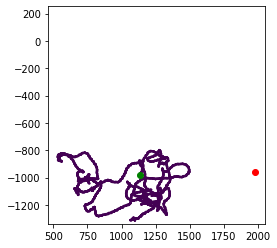

In [ ]:
for track_ind in range(10):
    plt.figure()
    with open(f'L446_Ctrls/{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    plt.scatter(track['x'], track['y'],s=2,c=track['action'])
    plt.plot(*tdict[targets[track_ind]],'o',c='red')
    plt.plot(track['x'][0],track['y'][0],'o',c='green')
    plt.axis('square')
    plt.savefig(f'./L446_Ctrls/track{track_ind}.svg')

In [ ]:
all_closests = []
for track_ind in range(10):
    with open(f'L446_Ctrls/{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    closest = 1e6
    target = tdict[targets[track_ind]]
    for pt in range(len(track['x'])):
        if track_ind==0:
            if track['y'][pt] > -750:
                continue
        dist = np.linalg.norm(np.array([track['x'][pt], track['y'][pt]]) - np.array(target))
        if dist < closest:
            closest = dist
    all_closests.append(closest)

In [ ]:
all_closests

[818.2627939726943,
 773.0569189910922,
 319.64042297556796,
 1013.2176469051454,
 844.1996209428195,
 716.4530689445053,
 316.79646462673793,
 643.7468446524612,
 847.3446760321327,
 482.0041493597332]

In [ ]:
closest_cm = np.array(all_closests)/540
closest_cm

array([1.51530147, 1.43158689, 0.59192671, 1.87632898, 1.56333263,
       1.32676494, 0.58666012, 1.19212379, 1.56915681, 0.89260028])

In [ ]:
print(np.mean(closest_cm), np.std(closest_cm))

1.2545782606301648 0.41298096592315414


The U-value is 8. The critical value of U at p < .05 is 27. Therefore, the result is significant at p < .05.

The z-score is -3.13711. The p-value is .00084. The result is significant at p < .05.

# Stats

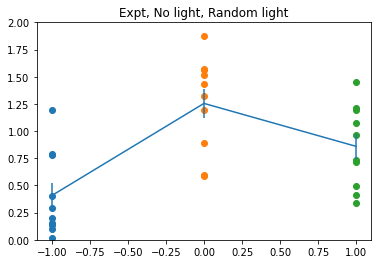

In [ ]:
plt.scatter(np.zeros(10)-1, [0.40295973, 0.78394819, 0.02095131, 1.19716887, 0.09567105,
       0.29604156, 0.2003512 , 0.15255034, 0.13276628, 0.78699346]) # expt
plt.scatter(np.zeros(10), [1.51530147, 1.43158689, 0.59192671, 1.87632898, 1.56333263,
       1.32676494, 0.58666012, 1.19212379, 1.56915681, 0.89260028]) # no light
plt.scatter(np.zeros(10)+1, [0.73426802, 1.45227814, 0.49646556, 0.71631008, 0.96116106,
       1.07517504, 1.21391114, 1.19110933, 0.40992488, 0.34271769]) # random light

plt.errorbar([-1,0,1],[.40694, 1.25458, .85933], yerr=[0.367667/np.sqrt(10), 0.41298/np.sqrt(10), 0.35791/np.sqrt(10)])
plt.ylim([0,2])
plt.title('Expt, No light, Random light')
plt.savefig('446_stats.svg')

The U-value is 23. The critical value of U at p < .05 is 27. Therefore, the result is significant at p < .05.

The z-score is -2.00321. The p-value is .02275. The result is significant at p < .05.

BETWEEN CONTROLS